In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("gold_price_data.csv")
df.head(10)

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100
5,2004-11-26,45.290001,45.290001,45.599998,45.060001,45.250000,3097700
6,2004-11-29,45.400002,45.400002,45.500000,45.080002,45.099998,3759000
7,2004-11-30,45.119999,45.119999,45.410000,44.820000,45.369999,3857200
8,2004-12-01,45.380001,45.380001,45.590000,45.259998,45.279999,2037500
9,2004-12-02,44.950001,44.950001,45.570000,44.680000,45.549999,6457800


In [21]:
mean_closing = df["close"].mean()
print("mean_closing:", mean_closing)

mean_closing: 131.25655610915683


In [22]:
med_closing = df["close"].median()
print("median_closing:", med_closing)

median_closing: 123.9800033569336


In [23]:
std_closing = df["close"].std()
print("std_closing:", std_closing)

std_closing: 51.073175174715935


In [24]:
max_closing = df["close"].max()
print("max_closing:", max_closing)

max_closing: 315.0400085449219


In [25]:
min_closing = df["close"].min()
print("min_closing:", min_closing)

min_closing: 41.02000045776367


In [26]:
close_range = max_closing - min_closing
print(close_range)

274.0200080871582


In [27]:
days_max = df["date"][df["close"]==max_closing]
print(days_max)

5174    2025-06-13
Name: date, dtype: object


In [28]:
all_days = df["date"]
first_30_days = all_days[0:30]
first_30_days

0     2004-11-18
1     2004-11-19
2     2004-11-22
3     2004-11-23
4     2004-11-24
5     2004-11-26
6     2004-11-29
7     2004-11-30
8     2004-12-01
9     2004-12-02
10    2004-12-03
11    2004-12-06
12    2004-12-07
13    2004-12-08
14    2004-12-09
15    2004-12-10
16    2004-12-13
17    2004-12-14
18    2004-12-15
19    2004-12-16
20    2004-12-17
21    2004-12-20
22    2004-12-21
23    2004-12-22
24    2004-12-23
25    2004-12-27
26    2004-12-28
27    2004-12-29
28    2004-12-30
29    2004-12-31
Name: date, dtype: object

In [29]:
last_30_days = all_days[-30:]
last_30_days

5185    2025-07-01
5186    2025-07-02
5187    2025-07-03
5188    2025-07-07
5189    2025-07-08
5190    2025-07-09
5191    2025-07-10
5192    2025-07-11
5193    2025-07-14
5194    2025-07-15
5195    2025-07-16
5196    2025-07-17
5197    2025-07-18
5198    2025-07-21
5199    2025-07-22
5200    2025-07-23
5201    2025-07-24
5202    2025-07-25
5203    2025-07-28
5204    2025-07-29
5205    2025-07-30
5206    2025-07-31
5207    2025-08-01
5208    2025-08-04
5209    2025-08-05
5210    2025-08-06
5211    2025-08-07
5212    2025-08-08
5213    2025-08-11
5214    2025-08-12
Name: date, dtype: object

In [60]:
# while len(all_days)%30:
#     all_days = pd.concat((all_days, pd.Series([None,], index=[len(all_days),])))
# all_days

In [61]:
# reshaped = all_days.values.reshape(-1,30)
# reshaped

In [62]:
# type(reshaped)

In [100]:
day_close = pd.DataFrame(df[["date","close"]])
day_close["date"] = pd.to_datetime(day_close["date"])

In [116]:
monthly_means = day_close.groupby([day_close["date"].dt.year, day_close["date"].dt.month]).agg(pd.Series.mean)
print("change from first month to last month:", monthly_means.iloc[-1]["close"] - monthly_means.iloc[0]["close"])

change from first month to last month: 264.5212507247925


In [139]:
df["daily_change"] = df["adj_close"] - df["open"]
df[-20:]

,date,open,high,low,close,adj_close,volume,daily_change
5195,2025-07-16,308.260010,308.260010,311.089996,305.730011,307.109985,17693100,-1.150024
5196,2025-07-17,307.589996,307.589996,307.670013,305.119995,305.500000,6642300,-2.089996
5197,2025-07-18,308.390015,308.390015,309.369995,308.320007,309.239990,5574300,0.849976
5198,2025-07-21,313.130005,313.130005,313.309998,311.609985,311.880005,10995800,-1.250000
5199,2025-07-22,316.100006,316.100006,316.239990,313.619995,314.480011,13691800,-1.619995
5200,2025-07-23,312.179993,312.179993,314.959991,311.420013,314.000000,10547500,1.820007
5201,2025-07-24,310.269989,310.269989,310.989990,309.059998,309.290009,7698800,-0.979980
5202,2025-07-25,307.399994,307.399994,308.309998,306.200012,307.820007,9376400,0.420013
5203,2025-07-28,305.410004,305.410004,306.579987,304.049988,306.440002,9275400,1.029999
5204,2025-07-29,306.250000,306.250000,307.029999,304.989990,305.799988,5741100,-0.450012


In [126]:
max_increase = df["daily_change"].max()
print(max_increase)
max_decrease = df["daily_change"].min()
print(max_decrease)

8.900009155273438
-8.349998474121094


In [137]:
max_increase_day = df["date"][df["daily_change"]==max_increase]
print("biggest increase (adjusted) occurred on:",*max_increase_day.values)
max_decrease_day = df["date"][df["daily_change"]==max_decrease]
print("biggest drop (adjusted) occurred on:",*max_decrease_day.values)

biggest increase (adjusted) occurred on: 2012-02-29
biggest drop (adjusted) occurred on: 2008-09-17


In [138]:
mean_daily_change = df["daily_change"].mean()
print("mean_daily_change:", mean_daily_change)

std_dev_daily_change = df["daily_change"].std()
print("std_dev_daily_change:", std_dev_daily_change)

mean_daily_change: -0.0017851386065681942
std_dev_daily_change: 0.9651084228660866


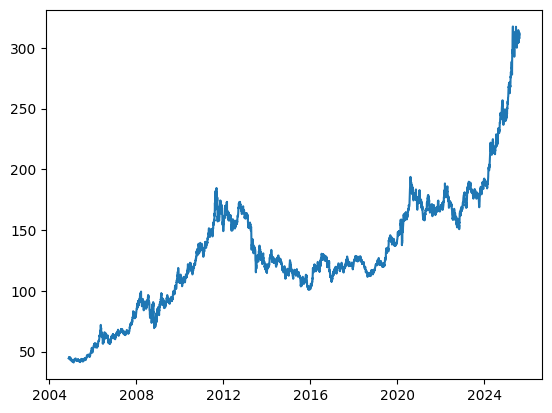

In [143]:
import matplotlib.pyplot as plt
plt.plot(pd.to_datetime(df["date"]), df["adj_close"])
plt.show()